<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge-Explanation" data-toc-modified-id="Challenge-Explanation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge Explanation</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Reviewing-Training-Labels" data-toc-modified-id="Reviewing-Training-Labels-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reviewing Training Labels</a></span></li><li><span><a href="#Reviewing-the-Training-Features" data-toc-modified-id="Reviewing-the-Training-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reviewing the Training Features</a></span><ul class="toc-item"><li><span><a href="#Reviewing-the-Numerical-Features" data-toc-modified-id="Reviewing-the-Numerical-Features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Reviewing the Numerical Features</a></span><ul class="toc-item"><li><span><a href="#amount_tsh" data-toc-modified-id="amount_tsh-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>amount_tsh</a></span></li><li><span><a href="#gps_height" data-toc-modified-id="gps_height-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>gps_height</a></span></li><li><span><a href="#num_private" data-toc-modified-id="num_private-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>num_private</a></span></li><li><span><a href="#population" data-toc-modified-id="population-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>population</a></span></li><li><span><a href="#latitude-and-longitude" data-toc-modified-id="latitude-and-longitude-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>latitude and longitude</a></span></li><li><span><a href="#construction_year" data-toc-modified-id="construction_year-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>construction_year</a></span></li></ul></li><li><span><a href="#Reviewing-the-Categorical-Features" data-toc-modified-id="Reviewing-the-Categorical-Features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Reviewing the Categorical Features</a></span><ul class="toc-item"><li><span><a href="#Individual-Categorical-Features" data-toc-modified-id="Individual-Categorical-Features-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Individual Categorical Features</a></span></li><li><span><a href="#Geological-Features" data-toc-modified-id="Geological-Features-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Geological Features</a></span></li><li><span><a href="#Management-Features" data-toc-modified-id="Management-Features-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Management Features</a></span></li><li><span><a href="#Extraction-Features" data-toc-modified-id="Extraction-Features-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Extraction Features</a></span></li><li><span><a href="#Source-Features" data-toc-modified-id="Source-Features-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Source Features</a></span></li></ul></li><li><span><a href="#Comments-on-Missing-Data-and-Handling" data-toc-modified-id="Comments-on-Missing-Data-and-Handling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Comments on Missing Data and Handling</a></span></li></ul></li><li><span><a href="#Reviewing-the-Testing-Set" data-toc-modified-id="Reviewing-the-Testing-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reviewing the Testing Set</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Pump It Up Challenge

## Challenge Explanation

## Data 

In [82]:
# %load ../../Imports.py
#Imports
##General
import pandas as pd
import numpy as np

##Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Default Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 8)

In [85]:
#Training Data
X_train = pd.read_csv("Data/Raw/Train.csv")
y_train = pd.read_csv("Data/Raw/Train_Labels.csv")
merged_df = pd.merge(X_train, y_train, on = 'id')

#Test Data
X_test = pd.read_csv("Data/Raw/Test.csv")

## Reviewing Training Labels

In [318]:
y_train.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [322]:
y_train.isna().sum()

id              0
status_group    0
dtype: int64

In [328]:
txt = '{percent: .2f}% of the labels are functional.'
percent = sum(y_train['status_group'] == 'functional')/y_train.shape[0]*100
print(txt.format(percent = percent))

 54.31% of the labels are functional.


In [335]:
txt = '{percent: .2f}% of the labels are non-functional.'
percent = sum(y_train['status_group'] == 'non functional')/y_train.shape[0]*100
print(txt.format(percent = percent))

 38.42% of the labels are non-functional.


In [333]:
txt = '{percent: .2f}% of the labels are functional, but in need of repair.'
percent = sum(y_train['status_group'] == 'functional needs repair')/y_train.shape[0]*100
print(txt.format(percent = percent))

 7.27% of the labels are functional, but in need of repair.


## Reviewing the Training Features

In [27]:
X_train.shape

(59400, 40)

In [107]:
pd.set_option('display.max_columns', 40)
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [145]:
#X_train.dtypes

The `date_recorded` feature was parsed as an object, so I'll convert this to `datetime` below, and review the dates.

In [4]:
X_train.date_recorded = pd.to_datetime(X_train.date_recorded)

In [5]:
X_train.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [6]:
X_train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Text(0.5, 1, 'Heatmap of Missing Values in the Training Set')

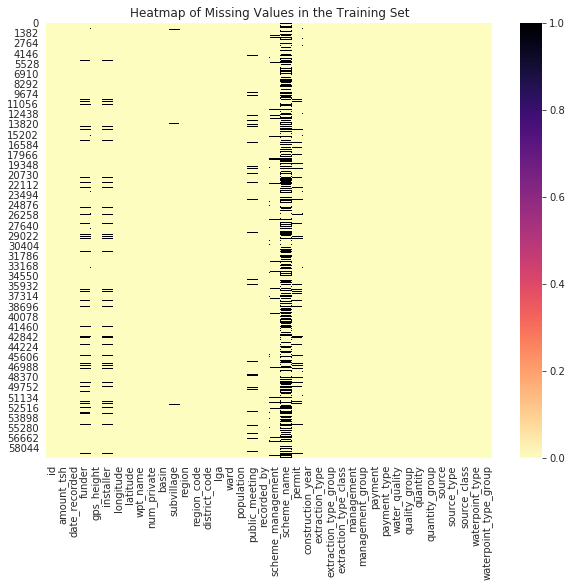

In [39]:
sns.heatmap(X_train.isna(), cmap = 'magma_r')
plt.title("Heatmap of Missing Values in the Training Set")

In [7]:
train_num = []
train_cat = []
for feat in X_train.dtypes.index:
    if X_train[feat].dtype == "int64" or X_train[feat].dtype == "float64":
        train_num.append(feat)
    elif X_train[feat].dtype == "object":
        train_cat.append(feat)

### Reviewing the Numerical Features

In [126]:
X_train[train_num].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


There are a couple of variables in the "numeric" set which are clearly coded categorical variables. These are,
+ region_code
+ district_code

I'll review them separately.

For the variables that are truly numeric, it appears that 0 has been used as a flag for missing values. Lets review these first.

#### amount_tsh

In [157]:
sum(X_train['amount_tsh'] == 0)

41639

In [359]:
txt = "{percent: .2f}% of the 'amount_tsh' observations are missing or 0."
percent = sum(X_train['amount_tsh'] == 0)/X_train.shape[0]*100
print(txt.format(percent = percent))

 70.10% of the 'amount_tsh' observations are missing or 0.


In [315]:
#Descriptives including the 0 values
X_train['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [340]:
#Descriptives grouped over regions
#Includes zero values
X_train['amount_tsh'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,3350.0,360.923881,2274.915820,0.0,0.0,0.0,10.0,20000.0
Dar es Salaam,805.0,236.706832,2612.250698,0.0,0.0,50.0,50.0,45000.0
Dodoma,2201.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Iringa,5294.0,1206.347752,4782.562343,0.0,0.0,500.0,1000.0,117000.0
Kagera,3316.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Kigoma,2816.0,347.658026,851.803578,0.0,0.0,150.0,300.0,26000.0
Kilimanjaro,4379.0,256.826821,2184.879625,0.0,0.0,0.0,20.0,120000.0
Lindi,1546.0,28.405563,171.470406,0.0,0.0,0.0,20.0,5400.0
Manyara,1583.0,262.463677,1675.603743,0.0,0.0,0.0,20.0,50000.0


In [337]:
#Desccriptives of the non-zero values
X_train[X_train['amount_tsh'] > 0]['amount_tsh'].describe()

count     17761.000000
mean       1062.351942
std        5409.344940
min           0.200000
25%          50.000000
50%         250.000000
75%        1000.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [342]:
#Descriptives grouped over regions
#Excludes zero values
X_train[X_train['amount_tsh'] > 0]['amount_tsh'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,915.0,1321.415301,4206.195290,5.0,10.0,20.0,50.0,20000.0
Dar es Salaam,535.0,356.166355,3198.669986,20.0,50.0,50.0,100.0,45000.0
Iringa,3442.0,1855.434340,5829.131050,20.0,500.0,1000.0,2000.0,117000.0
Kigoma,1497.0,653.977956,1079.273912,10.0,250.0,250.0,600.0,26000.0
Kilimanjaro,2025.0,555.380074,3187.448193,0.2,6.0,20.0,450.0,120000.0
Lindi,462.0,95.054113,303.627289,10.0,25.0,50.0,50.0,5400.0
Manyara,573.0,725.095986,2725.650147,2.0,20.0,50.0,100.0,50000.0
Mara,367.0,584.158038,3256.133649,10.0,50.0,100.0,500.0,60000.0
Morogoro,1965.0,428.380153,582.039633,10.0,200.0,300.0,500.0,15000.0


This is notably worrying, as more than 50% of the wells in the data set are listed as being function, but well over 70% are marked as having no water available (or missing). Additionally, the spread of the non-zero observations is very large. I have to believe that there are in fact some wells which have no water available to them, so not all of these values are missing values, but I have no way, that I've seen yet, of determining which of those are missing flags and which are actual values.

#### gps_height

In [179]:
sum(X_train['gps_height'] == 0)

20438

Since the majority of Tanzania is not located at sea level, the number of 0 observations in this feature tells me that 0 is being used as a mark for missing information. I'll use the [Jawgmaps Elevation API](https://www.jawg.io/docs/apidocs/elevation/) to generate the altitude of the well using the given latitude and longitude values in the data. I'll need to fill any missing lat/long values before creating my new elevation feature.  
To fill the missing `gps_height` values I'll create a new feature called `well_elevation`. Then I'll merge the two columns on the observations where `gps_height` = 0. I've provided the function I'll be using below, although I won't be compiling the new features here.

In [304]:
import requests
from Keys import access_token
def get_elevation(lat, long, access_token = acess_token):
    #This function will query the Jawg API
    #using a given latitude and longitude
    #You need an access token for the Jawg API, but they can be aquired for free through their website
    query = ('https://api.jawg.io/elevations?locations={},{}&access-token={}'.format(lat, long, access_token))
    r = requests.get(query).json() 
    
    #extracting elevation from the json object
    elevation = pd.io.json.json_normalize(r)['elevation'].values[0]
    return elevation

In [305]:
#Test run of my function
get_elevation(-9.856322, 34.938093)

1386.5

In [143]:
X_train['gps_height'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,3350.0,1401.144179,299.840596,594.0,1182.25,1401.0,1568.75,2770.0
Dar es Salaam,805.0,31.105590,38.325135,-63.0,5.00,29.0,60.00,151.0
Dodoma,2201.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Iringa,5293.0,1697.500094,357.944513,443.0,1517.00,1719.0,1945.00,2568.0
Kagera,3316.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Kigoma,2816.0,1235.562145,212.025702,768.0,1082.75,1274.0,1361.00,1760.0
Kilimanjaro,4379.0,1180.891528,332.544259,337.0,908.00,1241.0,1435.00,1888.0
Lindi,1546.0,212.866106,173.013974,-51.0,54.00,233.0,347.75,851.0
Manyara,1582.0,1426.545512,352.446747,561.0,1183.25,1474.5,1674.00,2253.0


#### num_private

In [180]:
sum(X_train['num_private'] == 0)

58643

In [254]:
txt = "{percent: .2f}% of the 'num_private' observations are missing."
percent = sum(X_train['num_private'] == 0)/X_train.shape[0]*100
print(txt.format(percent = percent))

 98.73% of the 'num_private' observations are missing.


I have two issues with the `num_private` feature. First, more than 98% of the observations are missing. Second, there is no description of this feature in the provided data information. Due to the incredibly high rate of missing values in this feature, I'll be dropping it from the working set.

#### population

In [181]:
sum(X_train['population'] == 0)

21381

In [358]:
txt = "{percent: .2f}% of the 'population' observations are missing or 0."
percent = sum(X_train['population'] == 0)/X_train.shape[0]*100
print(txt.format(percent = percent))

 35.99% of the 'population' observations are missing or 0.


In [256]:
X_train['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [258]:
#X_train[X_train['population'] == 0][train_cat].describe()
#X_train[X_train['population'] == 0][train_num].describe()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,19265,19250,21381,21381,21020,21381,21381,21381,20399,21381,20016,8355,20272,21381,21381,21381,21381,21381,21381,21381,21381,21381,21381,21381,21381,21381,21381,21381,21381
unique,635,695,13898,9,8153,13,53,856,2,1,10,808,2,18,13,7,11,5,7,7,8,6,5,5,10,7,3,7,6
top,Government Of Tanzania,DWE,none,Lake Victoria,M,Shinyanga,Rungwe,Nkungulu,True,GeoData Consultants Ltd,VWC,None,True,gravity,gravity,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,communal standpipe
freq,2826,6801,1315,7716,187,4818,1106,121,18333,21381,14406,622,12984,7611,7611,8635,14713,19565,11577,11577,18204,18204,11556,11556,9033,9033,17520,8829,9748


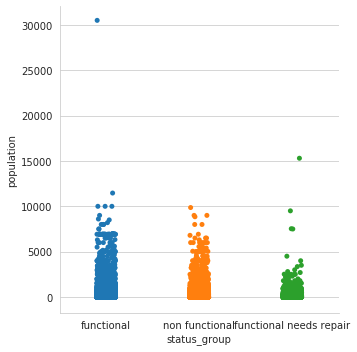

In [138]:
sns.catplot(x = 'status_group', y = 'population', data = merged_df)

In [399]:
X_train[X_train['population'] > 15000]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
14308,49354,0.0,2013-02-21,Water Board,1084,Water board,36.386050,-4.787678,Mashineni,0,Internal,Engarakashi,Manyara,21,5,Kiteto,Makame,15300,True,GeoData Consultants Ltd,VWC,Water board,False,1983,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
30537,12169,0.0,2011-03-12,Government Of Tanzania,184,DWE,38.783756,-5.181904,Mkwajuni,0,Pangani,Mkwajuni,Tanga,4,3,Muheza,Masuguru,30500,True,GeoData Consultants Ltd,VWC,NaN,False,2008,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


There are two wells which seem to have erroneous high populations. Lets look at them individually,
1. Population 30,500:
* This well is said to be located in the Mkwajuni subvillage, in the Tanga region, in the Masuguru ward. 

In [152]:
X_train['population'].groupby(X_train['region_code']).describe()

,count,mean,std,min,25%,50%,75%,max
region_code,,,,,,,,
1,2201.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
2,3024.0,245.004299,428.327436,0.0,120.0,150.0,250.00,9500.0
3,4379.0,105.747888,294.260177,1.0,1.0,40.0,120.00,8000.0
4,2513.0,239.775965,790.095378,1.0,1.0,70.0,250.00,30500.0
5,4040.0,268.815594,342.339200,1.0,80.0,200.0,300.00,5000.0
6,1609.0,248.344313,660.116198,1.0,20.0,50.0,200.00,11463.0
7,805.0,240.843478,534.198421,1.0,90.0,150.0,250.00,9865.0
8,300.0,346.116667,423.693581,1.0,200.0,270.0,381.25,5050.0
9,390.0,248.353846,269.167598,1.0,1.0,217.5,408.75,2238.0


The population for more than 35% of the villages containing the wells are marked as having a population of 0. There aren't any discernible patterns between the 0 population observations and any of the categorical or numerical variables. I was specifically interested in the location information, but again, I noticed no immediate pattern.  
As such, I'll most likely fill this value using the mean for the region or the subvillage.

#### latitude and longitude

The the listed values for Tanzania are 6.3690° S, 34.8888° E. Values for West and south are listed in negatives in the data set. The average values for our data are as given below.

In [182]:
X_train['latitude'].mean()

-5.706032659626503

In [183]:
X_train['longitude'].mean()

34.07742669202832

In [186]:
#sum(X_train['latitude'] ==0) No values equal to 0
sum(X_train['longitude'] == 0)

1812

There are 1812 observations for which the longitude is 0, but Tanzania does not cross the equator. As such, there are no locations in the data set which would actually take on a value of 0.

In [145]:
X_train[X_train['longitude'] == 0].head()#.groupby(X_train.subvillage).describe()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [197]:
sum(X_train['latitude'] == -2.000000e-08)

1812

In [251]:
X_train[X_train['longitude'] == 0].groupby(X_train.region).describe()

id                                                       \
            count          mean           std    min      25%      50%   
region                                                                   
Mwanza      807.0  38365.079306  21801.929635   15.0  18536.5  40272.0   
Shinyanga  1005.0  36606.739303  21073.965942  194.0  18436.0  35776.0   

                            amount_tsh                                     \
               75%      max      count mean  std  min  25%  50%  75%  max   
region                                                                      
Mwanza     56729.5  74190.0      807.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Shinyanga  54378.0  74193.0     1005.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          gps_height                 ... district_code                 \
               count mean  std  min  ...           25%  50%  75%  max   
region                               ...                                
Mwanza         807.0  0.0  0.0  0.0  ...           2.0  6.0  6.0  6.0   
Shinyanga     1005.0  0.0  0.0  0.0  ...           1.0  1.0  1.0  4.0   

          population                                    construction_year  \
               count mean  std  min  25%  50%  75%  max             count   
region                                                                      
Mwanza         807.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0             807.0   
Shinyanga     1005.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            1005.0   

                                              
          mean  std  min  25%  50%  75%  max  
region                                        
Mwanza     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Shinyanga  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 80 columns]

It looks like the value -2.000000e-08 was assigned to the unknown latitudes. 

In [249]:
X_train[(X_train['region'] == 'Mwanza') & (X_train['latitude'] < -0.01) & (X_train['longitude'] > 0)].describe()[['latitude', 'longitude']]

,latitude,longitude
count,2295.000000,2295.000000
mean,-2.620502,33.091564
std,0.329898,0.329287
min,-3.424444,32.046458
25%,-2.847182,32.943112
50%,-2.634751,33.081836
75%,-2.476632,33.345810
max,-1.714486,33.756895


In [250]:
X_train[(X_train['region'] == 'Shinyanga')  & (X_train['latitude'] < -0.01) & (X_train['longitude'] > 0)].describe()[['latitude', 'longitude']]

,latitude,longitude
count,3977.000000,3977.000000
mean,-3.495696,33.240121
std,0.328573,0.765545
min,-4.381946,31.454726
25%,-3.768391,32.535525
50%,-3.499209,33.437223
75%,-3.229457,33.860597
max,-2.823028,34.758734


All of the missing latitude and longitude values belong to the Mwanza and Shinyanga, although they don't represent all observations in these regions. 
Both the Mwanza and Shinyanga regions in Tanzania are very small, so I'll fill the missing latitude and longitudes with the average for the respective regions.

#### construction_year

Just like the numeric variables, the construction_year feature also takes on 0 as a flag for missing values.

In [176]:
txt = "{percent: .2f}% of the construction_year observations are missing."
percent = (sum(X_train['construction_year'] == 0)/X_train.shape[0])*100
print(txt.format(percent = percent))

 34.86% of the construction_year observations are missing.


In [366]:
X_train[X_train['construction_year'] > 0]['construction_year'].describe()

count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

Text(0.5, 0, 'Construction Year \n Wells in the data set were constructed bewteen 1960 and 2013.')

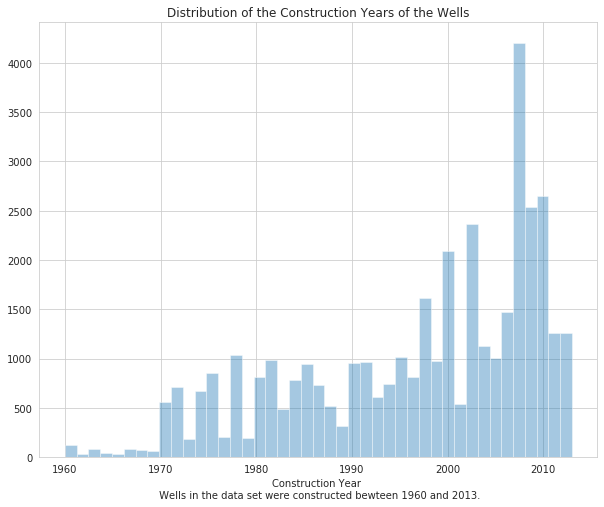

In [369]:
sns.distplot(X_train[X_train['construction_year'] > 0]['construction_year'], kde = False)
plt.title("Distribution of the Construction Years of the Wells")
plt.xlabel("Construction Year \n Wells in the data set were constructed bewteen 1960 and 2013.")

### Reviewing the Categorical Features

In [144]:
X_train[train_cat].describe()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


Just looking at this initial descriptive information, I have a few comments.  
First, there are multiple features with incredibly high numbers of levels, which will make them rather difficult, if not impossible to use in modeling in their naive form. I'll review these to see if there is a logical way to collapse these, or if the information is captured by another feature such that I can simply remove the feature from the data set.  
Second, There are multiple features, as according to the data descriptive file provided for the competition, which are markers for similar information. These include multiple features describing the geographical information, 
+ subvillage
+ region
+ region_code
+ district_code
+ lga
+ ward  

features describing the extraction method for the well in question,
+ extraction_type
+ extraction_type_group
+ extraction_type_class  

features describing the management of the well,
+ management (how the well is managed)
+ management_group (how the well is managed)
+ scheme_management (who manages the well)
+ scheme_name (who manages the well)

features describing the source of the water for the well,
+ source
+ source_type
+ source_class  

and two features describing the cost, quality, quantity, and waterpoint type of the well
+ payment & payment_type
+ water_quality & quality_group
+ quantity & quantity_group
+ waterpoint_type & waterpoint_type_group

I'll analyze the categorical variables by group when available, paying special attention to those with notably high amounts of categories.

#### Individual Categorical Features

**`funder` & `installer`**

In [154]:
X_train[['funder', 'installer']].describe()

,funder,installer
count,55765,55745
unique,1897,2145
top,Government Of Tanzania,DWE
freq,9084,17402


The next two categorical features of interest are `funder` and `installer`, with 1897 and 2145 unique values, respectively. These refer to who funded the installation of the well, and who installed the well. Although I believe that these two features may have a strong link to the functionality of the wells, when I conducted a more indepth examination of the features (seen below), I found many issues.  

The `installer` feature seems to be entered by hand with little to no regard for consistency when it comes to spelling, abbreviations, or language. Even the manner is which missing values were recorded has no standard; some missing values are marked with 0, others with the phrases "Unknown", "Not known", "Not kno", and "Uknown Installer", to provide simply a few examples.  
The `funder` feature is slightly less error-prone, but faces similar issues overall. For example, it appears that a few wells were funded by the Swedish government. These different wells are listed as being fund by:
+ Sweden
+ Swedish
+ Sweeden
+ Swidish

In [155]:
install_levels = X_train['installer'].drop_duplicates()
install_levels.sort_values(inplace = True)
len(install_levels)

In [96]:
for level in install_levels:
    print(level)

-
0
A.D.B
AAR
ABASIA
ABD
ABDALA
ABDUL
AC
ACORD
ACRA
ACT
ACT MARA
ACTION AID
ACTIVE TANK CO
ACTIVE TANK CO LTD
AD
ADAP
ADB
ADP
ADP Busangi
ADRA
ADRA /Government
ADRA/Government
AF
AFRICA
AFRICA MUSLIM
AFRICAN DEVELOPMENT FOUNDATION
AFRICAN REFLECTIONS FOUNDATION
AGRICAN
AI
AIC
AIC KI
AICT
AIMGOLD
AIXOS
ALIA
ALLYS
AMP Contract
AMP Contracts
AMP contractor
AMREF
ANGLI
ANGLIKANA CHURCH
ANGRIKANA
ANSWAR
APM
AQAL
AQUA BLUES ANGELS
AQUA WEL
AQUA Wat
AQUA Wel
AQUARMAN DRILLERS
ASDP
ATIGH BUILDINGS
AUSTRALIA
AUWASA
Aartisa
Abdallah Ally Wazir
Accra
Action Aid
Action Contre La Faim
Action Contre la Faim
Active KMK
Active MKM
Adam
Adam Kea
Adam mualuaka
Adra
Adra /Community
Adra/ Community
Adra/Community
Adrs
Af
Africa
Africa Amini Alama
Africa Islamic Agency Tanzania
Africa M
Africa Muslim Agenc
African Muslims Age
African Realief Committe of Ku
Africaone
Africaone Ltd
Africare
Afroz Ismail
Ahmad
Al Ha
Alex moyela
Altai Co. ltd
Amadi
Amari
Amboni Plantation
Amboni plantation
Ambrose
Amec
America

Some groups into which I could collapse these, as I review them, are
+ Governments/Countries/Cities
* Watch words: govern, ministry, country name, city name, council (concil), district, parliament, municipal, town, authority, village, community, central, department, embassy, world, bank, local, DWE (I suspect this to be an abbreviation for department of water and energy)
+ Religious foundations/organizations
* Watch words: parish, mosque, church, mission, Muslim, Christian, temple, Islam, catholic, roman
+ Corporations
* Watch words: 'co', construct, ltd, contract, tech, workers, company, builder, drill, install, group
+ Charity/Donation
* Watch words: school, hospital, estate, project, institution, red cross, rotary, save, summit, aid, club, secondary

The problem being, I have no way of knowing that these groups will be comprised of parties following at all similar practices.

In [ ]:
funder_levels = X_train['funder'].drop_duplicates()
funder_levels.sort_values(inplace = True)
len(funder_levels)

In [156]:
for level in funder_levels:
    print(level)

0
A/co Germany
Aar
Abas Ka
Abasia
Abc-ihushi Development Cent
Abd
Abdala
Abddwe
Abdul
Abood
Abs
Aco/germany
Acord
Acord Ngo
Acra
Act
Act Mara
Action Aid
Action Contre La Faim
Action In A
Adap
Adb
Adf
Adp
Adp Bungu
Adp Mombo
Adp/w
Adra
Af
Afdp
Afric
Africa
Africa 2000 Network/undp
Africa Amini Alama
Africa Project Ev Germany
African
African 2000 Network
African Barrick Gold
African Development Bank
African Development Foundation
African Muslim Agency
African Realief Committe Of Ku
African Reflections Foundation
African Relie
Africaone Ltd
Africare
Afriican Reli
Afroz Ismail
Afya Department Lindi Rural
Agape Churc
Agt Church
Ahmadia
Ai
Aic
Aic Church
Aic Kij
Aict
Aimgold
Aixos
Alia
Ambwene Mwaikek
Amref
Amrefe
Anglican Church
Angrikana
Anjuman E Seifee
Answeer Muslim Grou
Apm
Apm[africa Precious Metals Lt
Aqua Blues Angels
Arab Community
Arabi
Arabs Community
Ardhi Instute
Area
Artisan
Asb
Asdp
Asgerali N Bharwan
Auwasa
Awf
B.A.P
Ba As
Babtest
Babtist
Bahewasa
Bahresa
Bakari Chimkube
Bak

**`wpt_name`**

In [149]:
X_train.wpt_name.describe()

count     59400
unique    37400
top        none
freq       3563
Name: wpt_name, dtype: object

With the highest number of unique values, the `wpt_name` feature is a list of the names of the water points. There are over 37,000 different names. As the name of the well is not likely to indicate much about its functionality, this feature will be dropped from the working data set.  

#### Geological Features

**`subvillage`**

In [151]:
X_train.subvillage.describe()

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object

With the next greatest number of unique values (19,000+), the `subvillage` feature is a list of the names of the villages containing the wells. As this is again, predominately a unique identifier, it does not benefit us to use it in prediction, and will be dropped from the working data set.  

**`region`**

In [371]:
X_train.region.describe()

count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

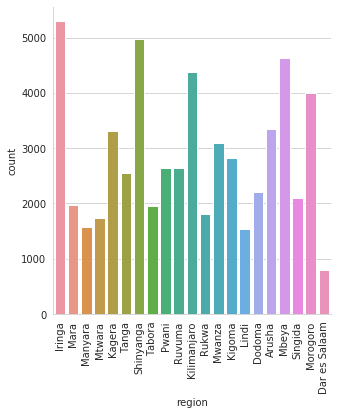

In [389]:
sns.catplot(x = 'region', kind = 'count', data = X_train)
plt.xticks(rotation = 90)

In [151]:
X_train[(X_train['region'] == 'Dodoma') | (X_train['region'] == 'Kagera') | (X_train['region'] == 'Mbeya') | (X_train['region'] == 'Tabora')].head(n=15)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
27,20145,0.0,2011-07-11,Hesawa,0,DWE,31.104257,-1.735361,Kwawilliam,0,Lake Victoria,Chakahaya,Kagera,18,1,Karagwe,Nyaishozi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
30,46804,0.0,2011-03-23,Water,0,Water,36.108312,-5.791000,Ngosi,0,Wami / Ruvu,Karume,Dodoma,1,4,Chamwino,Dabalo,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
36,67359,0.0,2011-07-16,Danida,0,Central government,33.854345,-9.638520,Office Ya Kijiji,0,Lake Nyasa,Ndanganyika,Mbeya,12,3,Kyela,Katumbasongwe,0,True,GeoData Consultants Ltd,VWC,Ngana water supplied scheme,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
37,60048,0.0,2011-03-27,Kirde,0,DWE,35.858373,-4.647906,Tangi,0,Internal,Baura,Dodoma,1,1,Kondoa,Mnenia,0,True,GeoData Consultants Ltd,VWC,Itun,False,0,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
47,13620,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
52,10745,0.0,2011-07-31,Kkkt_makwale,0,KKKT _ Konde and DWE,33.958163,-9.448122,Kwa Abeli Mwamakula,0,Lake Nyasa,Isimba,Mbeya,12,3,Kyela,Makwale,0,True,GeoData Consultants Ltd,VWC,Makwale water supplied sche,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
54,9417,0.0,2011-07-14,Sawaka,0,Artisan,30.983023,-1.680654,Sawaka,0,Lake Victoria,Kagoye B,Kagera,18,1,Karagwe,Kiruruma,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,dry,dry,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


**`region_code`**

In [153]:
X_train.region_code.describe()

count    59400.000000
mean        15.297003
std         17.587406
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64

In [154]:
X_train[X_train['region_code'] == 12].head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
36,67359,0.0,2011-07-16,Danida,0,Central government,33.854345,-9.638520,Office Ya Kijiji,0,Lake Nyasa,Ndanganyika,Mbeya,12,3,Kyela,Katumbasongwe,0,True,GeoData Consultants Ltd,VWC,Ngana water supplied scheme,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
47,13620,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
52,10745,0.0,2011-07-31,Kkkt_makwale,0,KKKT _ Konde and DWE,33.958163,-9.448122,Kwa Abeli Mwamakula,0,Lake Nyasa,Isimba,Mbeya,12,3,Kyela,Makwale,0,True,GeoData Consultants Ltd,VWC,Makwale water supplied sche,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
71,17386,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,Rufiji,Lembuka,Mbeya,12,7,Mbarali,Mawindi,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
72,41609,0.0,2011-04-04,NaN,0,NaN,34.247180,-8.607513,Kwa Mzee Mwalongo,0,Rufiji,Mapinduzi,Mbeya,12,7,Mbarali,Ubaruku,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe


**`district_code`**

In [155]:
X_train['district_code'].describe()

count    59400.000000
mean         5.629747
std          9.633649
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64

In [156]:
X_train['population'].groupby(X_train['district_code']).describe()

,count,mean,std,min,25%,50%,75%,max
district_code,,,,,,,,
0,23.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1,12203.0,182.246415,418.952017,0.0,0.00,5.0,250.00,10000.0
2,11173.0,229.002775,468.277380,0.0,0.00,100.0,296.00,11463.0
3,9998.0,180.710242,495.427602,0.0,0.00,50.0,250.00,30500.0
4,8999.0,132.940771,413.196187,0.0,0.00,30.0,120.00,8000.0
5,4356.0,157.913912,465.103039,0.0,0.00,50.0,200.00,15300.0
6,4074.0,125.862052,439.611167,0.0,0.00,0.0,56.00,6800.0
7,3343.0,99.442118,255.678948,0.0,0.00,1.0,120.00,6854.0
8,1043.0,87.737296,419.882147,0.0,0.00,0.0,1.00,8000.0


**`lga`**

In [370]:
X_train.lga.describe()

count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object

In [9]:
for thing in X_train['lga']:
    print(thing)

Ludewa
Serengeti
Simanjiro
Nanyumbu
Karagwe
Mkinga
Shinyanga Rural
Kahama
Tabora Urban
Karagwe
Mkuranga
Namtumbo
Maswa
Siha
Meatu
Sumbawanga Rural
Njombe
Njombe
Ukerewe
Ludewa
Njombe
Bariadi
Njombe
Same
Kigoma Rural
Moshi Rural
Lindi Rural
Karagwe
Rombo
Siha
Chamwino
Bagamoyo
Moshi Rural
Ludewa
Mafia
Arusha Rural
Kyela
Kondoa
Kilolo
Kibondo
Moshi Rural
Makete
Njombe
Singida Rural
Arusha Rural
Shinyanga Rural
Masasi
Rungwe
Kilolo
Njombe
Moshi Urban
Sumbawanga Rural
Kyela
Geita
Karagwe
Moshi Urban
Moshi Rural
Arusha Rural
Mbulu
Bukoba Rural
Muheza
Lushoto
Kigoma Rural
Meru
Iramba
Singida Rural
Njombe
Karagwe
Njombe
Kigoma Rural
Kilombero
Mbarali
Mbarali
Serengeti
Kasulu
Bukoba Urban
Njombe
Meru
Korogwe
Bukombe
Makete
Morogoro Rural
Meru
Kishapu
Musoma Rural
Sengerema
Iringa Rural
Muleba
Bagamoyo
Dodoma Urban
Kigoma Rural
Ruangwa
Bagamoyo
Hanang
Misenyi
Kasulu
Kasulu
Missungwi
Songea Rural
Shinyanga Rural
Tanga
Iramba
Kibondo
Tunduru
Hai
Mwanga
Maswa
Chato
Iringa Rural
Rungwe
Meru
Meru
Bi

Kilwa
Mufindi
Dodoma Urban
Kahama
Kasulu
Kigoma Rural
Lushoto
Meru
Kasulu
Same
Meru
Hanang
Ulanga
Kasulu
Bariadi
Ulanga
Mbarali
Mkinga
Bariadi
Moshi Rural
Kibondo
Lushoto
Mvomero
Moshi Urban
Magu
Mbinga
Meru
Igunga
Arusha Rural
Moshi Rural
Simanjiro
Dodoma Urban
Arusha Rural
Moshi Rural
Nzega
Mpwapwa
Shinyanga Urban
Biharamulo
Kyela
Singida Rural
Rombo
Bukombe
Tarime
Manyoni
Geita
Bariadi
Njombe
Namtumbo
Mbinga
Missungwi
Manyoni
Mtwara Rural
Kwimba
Kilombero
Kilosa
Mtwara Rural
Moshi Rural
Kilosa
Mbozi
Uyui
Arusha Rural
Namtumbo
Arusha Rural
Kyela
Tandahimba
Uyui
Mbozi
Njombe
Mkuranga
Ngara
Ileje
Kahama
Iringa Rural
Mbozi
Sikonge
Kilosa
Iramba
Njombe
Babati
Mbarali
Kasulu
Moshi Rural
Rungwe
Mafia
Mkuranga
Bagamoyo
Lindi Urban
Lindi Rural
Tarime
Siha
Moshi Rural
Bariadi
Siha
Kilosa
Ukerewe
Tunduru
Mpanda
Singida Rural
Kibondo
Kilosa
Hanang
Makete
Kilwa
Arusha Rural
Tunduru
Same
Igunga
Lindi Rural
Njombe
Makete
Njombe
Njombe
Njombe
Chato
Shinyanga Urban
Bariadi
Mpanda
Sengerema
Kasulu
Mu

Singida Rural
Ludewa
Mpanda
Kilosa
Bagamoyo
Mtwara Rural
Kasulu
Ngara
Mbarali
Shinyanga Rural
Kilwa
Longido
Urambo
Siha
Sumbawanga Rural
Tabora Urban
Rungwe
Njombe
Karatu
Sengerema
Kilombero
Njombe
Moshi Rural
Njombe
Lindi Rural
Moshi Rural
Songea Urban
Songea Rural
Siha
Urambo
Moshi Rural
Musoma Rural
Kigoma Rural
Lushoto
Tandahimba
Mbarali
Mbozi
Sengerema
Ngara
Moshi Rural
Arusha Rural
Mbarali
Mkuranga
Biharamulo
Singida Rural
Kongwa
Korogwe
Manyoni
Tanga
Njombe
Mtwara Rural
Monduli
Bunda
Kigoma Rural
Mbulu
Igunga
Bukoba Rural
Meru
Kasulu
Kilwa
Chamwino
Kyela
Kilosa
Hanang
Mpanda
Njombe
Kishapu
Misenyi
Rungwe
Kilombero
Babati
Singida Urban
Uyui
Dodoma Urban
Bagamoyo
Ludewa
Kigoma Rural
Same
Kasulu
Kibaha
Morogoro Rural
Kongwa
Korogwe
Mpanda
Mpanda
Musoma Rural
Kasulu
Ileje
Singida Rural
Igunga
Mbeya Rural
Masasi
Makete
Rungwe
Kigoma Rural
Namtumbo
Mtwara Urban
Mbarali
Morogoro Rural
Kisarawe
Muheza
Kigoma Rural
Moshi Rural
Karagwe
Meru
Mtwara Rural
Kyela
Kyela
Kasulu
Mbinga
Moshi Rur

Same
Karagwe
Moshi Rural
Bariadi
Kondoa
Moshi Rural
Kibondo
Pangani
Njombe
Kisarawe
Geita
Kilombero
Meatu
Mbarali
Kilosa
Bagamoyo
Kinondoni
Urambo
Serengeti
Pangani
Muleba
Mpwapwa
Meru
Njombe
Meru
Karatu
Mpanda
Shinyanga Rural
Kilosa
Makete
Longido
Njombe
Singida Urban
Missungwi
Karatu
Missungwi
Njombe
Bagamoyo
Longido
Ulanga
Njombe
Nzega
Kishapu
Shinyanga Rural
Bagamoyo
Namtumbo
Sikonge
Lindi Rural
Kasulu
Sengerema
Iramba
Kilosa
Kibondo
Nzega
Nzega
Liwale
Ilala
Kongwa
Same
Morogoro Rural
Newala
Kishapu
Karagwe
Bariadi
Ruangwa
Mbulu
Mpanda
Njombe
Mkinga
Singida Rural
Serengeti
Tandahimba
Temeke
Njombe
Meatu
Tunduru
Ukerewe
Singida Urban
Nkasi
Mbeya Rural
Uyui
Arusha Rural
Mpanda
Rungwe
Chamwino
Hai
Magu
Arusha Rural
Kishapu
Mpwapwa
Kongwa
Muheza
Kishapu
Kasulu
Hai
Simanjiro
Rungwe
Uyui
Sikonge
Bagamoyo
Mbarali
Lindi Rural
Sengerema
Misenyi
Mpanda
Nzega
Hanang
Manyoni
Songea Rural
Bagamoyo
Kilosa
Chunya
Namtumbo
Masasi
Igunga
Moshi Rural
Mbinga
Karagwe
Maswa
Nzega
Rungwe
Morogoro Rural


Kigoma Rural
Same
Kasulu
Morogoro Rural
Makete
Kilosa
Kahama
Ilala
Missungwi
Siha
Missungwi
Hai
Shinyanga Rural
Ruangwa
Chato
Ngara
Namtumbo
Bukombe
Shinyanga Urban
Korogwe
Ludewa
Muheza
Lushoto
Hai
Kondoa
Shinyanga Rural
Bunda
Iramba
Rungwe
Kiteto
Dodoma Urban
Kyela
Mbozi
Ludewa
Lindi Rural
Mbozi
Mwanga
Musoma Rural
Kibaha
Namtumbo
Rufiji
Arusha Rural
Lushoto
Hanang
Manyoni
Mwanga
Simanjiro
Songea Rural
Kilolo
Muleba
Namtumbo
Nzega
Njombe
Bukoba Urban
Meru
Kasulu
Singida Rural
Kyela
Rungwe
Kongwa
Kwimba
Karagwe
Bariadi
Maswa
Longido
Kilosa
Songea Rural
Sumbawanga Rural
Musoma Rural
Morogoro Rural
Kiteto
Ludewa
Moshi Rural
Bariadi
Bunda
Missungwi
Arusha Rural
Morogoro Rural
Moshi Rural
Namtumbo
Kahama
Uyui
Bunda
Manyoni
Njombe
Songea Rural
Hai
Shinyanga Rural
Uyui
Kahama
Moshi Rural
Mufindi
Bagamoyo
Mbozi
Mbarali
Bagamoyo
Kigoma Rural
Bunda
Arusha Rural
Missungwi
Mbeya Rural
Serengeti
Kyela
Moshi Rural
Nkasi
Kasulu
Mvomero
Mpanda
Singida Rural
Kilosa
Nkasi
Babati
Same
Mafia
Nzega
Kilos

Njombe
Musoma Rural
Bukombe
Temeke
Same
Mpanda
Kondoa
Magu
Kisarawe
Newala
Mbeya Rural
Kasulu
Igunga
Meru
Hai
Kyela
Masasi
Kibaha
Bahi
Moshi Rural
Liwale
Moshi Rural
Lindi Rural
Karagwe
Mpwapwa
Biharamulo
Ilala
Urambo
Lushoto
Magu
Mbarali
Bukombe
Serengeti
Bagamoyo
Bagamoyo
Mbozi
Bukombe
Bagamoyo
Kigoma Rural
Bagamoyo
Njombe
Morogoro Rural
Musoma Rural
Meatu
Ruangwa
Kibaha
Maswa
Masasi
Temeke
Chunya
Singida Rural
Iringa Rural
Mbarali
Mtwara Rural
Iramba
Meatu
Pangani
Singida Rural
Ilala
Ngara
Babati
Njombe
Siha
Ngorongoro
Bariadi
Kilombero
Nzega
Nzega
Mbozi
Kondoa
Same
Meatu
Tarime
Bariadi
Njombe
Kibondo
Handeni
Nachingwea
Mpwapwa
Manyoni
Bagamoyo
Njombe
Kibaha
Mvomero
Mbinga
Handeni
Tanga
Serengeti
Serengeti
Same
Arusha Urban
Bukoba Urban
Mbarali
Mbozi
Kilwa
Meatu
Kilosa
Mbozi
Makete
Serengeti
Ruangwa
Sumbawanga Rural
Handeni
Namtumbo
Nkasi
Kibondo
Kiteto
Mbarali
Namtumbo
Bariadi
Njombe
Karagwe
Chamwino
Kibondo
Chato
Kwimba
Rufiji
Manyoni
Temeke
Tabora Urban
Mbulu
Mkinga
Mvomero
Moshi

Kibondo
Bagamoyo
Hai
Meru
Kongwa
Meatu
Ngara
Nachingwea
Bariadi
Manyoni
Mbarali
Kwimba
Siha
Iringa Rural
Makete
Kasulu
Rungwe
Kasulu
Bariadi
Songea Rural
Dodoma Urban
Chamwino
Geita
Kahama
Ruangwa
Ngara
Serengeti
Mpanda
Sengerema
Muheza
Ileje
Makete
Tanga
Ilala
Ngara
Mkinga
Hai
Kilosa
Simanjiro
Kasulu
Mpanda
Geita
Kyela
Igunga
Mbozi
Bagamoyo
Bariadi
Iramba
Makete
Maswa
Sumbawanga Rural
Geita
Serengeti
Meatu
Mvomero
Same
Njombe
Mwanga
Ulanga
Igunga
Korogwe
Mbeya Rural
Kilolo
Mkinga
Misenyi
Moshi Rural
Bukombe
Mbinga
Mufindi
Arusha Rural
Mbozi
Njombe
Lindi Rural
Bunda
Ruangwa
Mvomero
Kondoa
Songea Rural
Sumbawanga Urban
Misenyi
Moshi Rural
Morogoro Rural
Bariadi
Bukoba Rural
Kisarawe
Arusha Rural
Kigoma Rural
Musoma Rural
Hanang
Monduli
Arusha Rural
Dodoma Urban
Mbulu
Kyela
Njombe
Mufindi
Rorya
Iramba
Moshi Rural
Njombe
Kahama
Songea Rural
Siha
Kahama
Babati
Misenyi
Njombe
Meru
Morogoro Rural
Geita
Babati
Ngara
Singida Urban
Mpanda
Moshi Rural
Songea Rural
Nkasi
Tandahimba
Kongwa
Kilombe

Mbinga
Mtwara Rural
Rorya
Bagamoyo
Ukerewe
Handeni
Kwimba
Manyoni
Nkasi
Sumbawanga Rural
Bukombe
Bariadi
Karatu
Makete
Moshi Rural
Ukerewe
Hai
Liwale
Mwanga
Sumbawanga Rural
Bagamoyo
Moshi Rural
Chamwino
Mpanda
Serengeti
Maswa
Mkuranga
Hai
Kasulu
Iramba
Shinyanga Rural
Kahama
Korogwe
Hai
Iramba
Longido
Igunga
Ulanga
Kasulu
Kilwa
Morogoro Rural
Moshi Rural
Songea Rural
Makete
Sumbawanga Urban
Ngorongoro
Bunda
Meru
Njombe
Moshi Rural
Nkasi
Kasulu
Meatu
Kasulu
Songea Rural
Kahama
Ngorongoro
Ulanga
Moshi Rural
Ilala
Arusha Rural
Serengeti
Kongwa
Njombe
Bariadi
Siha
Hanang
Ludewa
Njombe
Kahama
Njombe
Babati
Mbozi
Bukombe
Ukerewe
Karatu
Temeke
Kilwa
Njombe
Missungwi
Kiteto
Ulanga
Bariadi
Hai
Meru
Magu
Kibondo
Kahama
Kisarawe
Simanjiro
Ilemela
Arusha Rural
Kilombero
Kilosa
Sumbawanga Rural
Biharamulo
Mbeya Rural
Geita
Bagamoyo
Kilombero
Karagwe
Monduli
Ilala
Misenyi
Babati
Njombe
Meru
Songea Rural
Mwanga
Nanyumbu
Mbinga
Makete
Handeni
Kyela
Hai
Morogoro Rural
Shinyanga Rural
Rufiji
Lindi Rura

Shinyanga Urban
Chamwino
Iramba
Serengeti
Lushoto
Moshi Rural
Mpwapwa
Morogoro Rural
Hai
Geita
Biharamulo
Kilwa
Shinyanga Rural
Misenyi
Meru
Kasulu
Mbinga
Magu
Rungwe
Kahama
Moshi Rural
Karatu
Nzega
Iringa Rural
Namtumbo
Ilala
Mpanda
Kibondo
Masasi
Maswa
Tandahimba
Bariadi
Tandahimba
Shinyanga Rural
Njombe
Bariadi
Pangani
Bagamoyo
Mufindi
Kilosa
Bariadi
Korogwe
Masasi
Iramba
Serengeti
Ulanga
Ngara
Njombe
Geita
Muleba
Meatu
Namtumbo
Meru
Manyoni
Monduli
Kishapu
Meru
Bariadi
Kwimba
Muheza
Kasulu
Kibondo
Kwimba
Bukombe
Mbinga
Nkasi
Mbulu
Monduli
Meatu
Ulanga
Temeke
Ngara
Namtumbo
Kibondo
Bunda
Mvomero
Magu
Bukoba Rural
Maswa
Muheza
Kigoma Rural
Mpanda
Bahi
Kahama
Kyela
Magu
Serengeti
Mbulu
Njombe
Kishapu
Rungwe
Moshi Rural
Nkasi
Arusha Rural
Singida Rural
Geita
Bukoba Urban
Karagwe
Makete
Mbozi
Kahama
Meatu
Kishapu
Maswa
Kilwa
Ngara
Meatu
Ulanga
Bagamoyo
Mbozi
Bagamoyo
Mtwara Urban
Nkasi
Hai
Missungwi
Mbozi
Kahama
Iringa Rural
Nkasi
Bagamoyo
Nachingwea
Chunya
Mbozi
Bukoba Rural
Rungwe
Sin

Magu
Rungwe
Sumbawanga Rural
Magu
Moshi Rural
Kilombero
Kwimba
Rombo
Bukombe
Bagamoyo
Meru
Meatu
Mufindi
Kondoa
Uyui
Babati
Magu
Iringa Rural
Iringa Rural
Hanang
Meru
Kahama
Singida Urban
Ukerewe
Korogwe
Mkinga
Mbulu
Bahi
Iringa Rural
Mbeya Rural
Karagwe
Urambo
Songea Rural
Lushoto
Kyela
Rorya
Shinyanga Urban
Bukombe
Magu
Maswa
Makete
Hai
Kondoa
Mpwapwa
Shinyanga Rural
Sumbawanga Urban
Mbarali
Temeke
Dodoma Urban
Kibondo
Morogoro Rural
Biharamulo
Simanjiro
Arusha Rural
Bunda
Babati
Bukoba Rural
Geita
Meru
Ngorongoro
Bagamoyo
Nzega
Bagamoyo
Rungwe
Mbinga
Rungwe
Sumbawanga Urban
Mkuranga
Mpwapwa
Kahama
Bahi
Iramba
Kilosa
Bariadi
Bariadi
Iringa Rural
Kahama
Iringa Rural
Singida Rural
Njombe
Njombe
Moshi Rural
Iramba
Ilala
Mbarali
Iramba
Kahama
Njombe
Njombe
Magu
Kondoa
Longido
Lindi Rural
Kyela
Kyela
Liwale
Ukerewe
Tarime
Sumbawanga Rural
Rungwe
Njombe
Biharamulo
Kilwa
Bukombe
Moshi Rural
Kilolo
Songea Urban
Magu
Serengeti
Mbozi
Maswa
Misenyi
Rungwe
Geita
Rombo
Mbeya Rural
Iramba
Kahama
U

Kilombero
Bariadi
Karatu
Kahama
Mbozi
Tanga
Igunga
Kwimba
Arusha Rural
Siha
Shinyanga Rural
Bahi
Mbozi
Lushoto
Handeni
Kibondo
Kasulu
Kilombero
Njombe
Arusha Rural
Kondoa
Makete
Same
Serengeti
Namtumbo
Meatu
Ngara
Liwale
Ulanga
Muleba
Njombe
Njombe
Musoma Rural
Rufiji
Kondoa
Arusha Rural
Singida Urban
Lushoto
Hanang
Mbozi
Bukombe
Rombo
Arusha Rural
Sumbawanga Rural
Tarime
Magu
Kondoa
Bariadi
Rungwe
Igunga
Serengeti
Babati
Manyoni
Singida Urban
Kwimba
Muleba
Misenyi
Kibondo
Igunga
Bukoba Rural
Mpanda
Lushoto
Singida Rural
Kongwa
Njombe
Mbeya Rural
Temeke
Kongwa
Maswa
Bariadi
Mbozi
Korogwe
Maswa
Shinyanga Rural
Njombe
Rombo
Namtumbo
Kiteto
Missungwi
Bariadi
Dodoma Urban
Moshi Rural
Bunda
Kilolo
Rungwe
Pangani
Moshi Rural
Rungwe
Bariadi
Bariadi
Kinondoni
Karagwe
Kasulu
Mpwapwa
Shinyanga Urban
Mpanda
Musoma Rural
Mbarali
Njombe
Makete
Mvomero
Nzega
Mbarali
Urambo
Geita
Mbarali
Masasi
Mbinga
Siha
Babati
Mbulu
Bukoba Urban
Njombe
Moshi Urban
Moshi Rural
Urambo
Pangani
Rombo
Sengerema
Ruangwa

Tandahimba
Chunya
Kigoma Rural
Temeke
Same
Iramba
Bukombe
Mwanga
Songea Rural
Arusha Rural
Rufiji
Ludewa
Karagwe
Kilombero
Meru
Arusha Rural
Ilala
Singida Rural
Kongwa
Misenyi
Ilala
Shinyanga Urban
Kyela
Bunda
Serengeti
Urambo
Mbarali
Kwimba
Kyela
Kigoma Rural
Bagamoyo
Kilolo
Mbinga
Serengeti
Arusha Rural
Njombe
Kilosa
Kilosa
Manyoni
Arusha Rural
Kondoa
Kilombero
Kilindi
Shinyanga Rural
Bagamoyo
Bagamoyo
Mbinga
Makete
Monduli
Mbinga
Shinyanga Rural
Kongwa
Singida Rural
Kilombero
Mbozi
Namtumbo
Ukerewe
Chunya
Kwimba
Uyui
Mwanga
Mwanga
Ludewa
Njombe
Kilombero
Moshi Rural
Songea Urban
Kahama
Kilolo
Hai
Rungwe
Rombo
Nkasi
Rufiji
Rorya
Missungwi
Mbarali
Karagwe
Arusha Rural
Arusha Rural
Urambo
Njombe
Same
Kwimba
Bagamoyo
Kigoma Urban
Moshi Rural
Ilemela
Morogoro Rural
Mkuranga
Newala
Kyela
Handeni
Bagamoyo
Morogoro Rural
Same
Mvomero
Biharamulo
Kilosa
Sengerema
Rombo
Arusha Rural
Sengerema
Kwimba
Singida Rural
Chato
Makete
Rungwe
Kisarawe
Masasi
Missungwi
Mtwara Urban
Kigoma Rural
Mbozi
Mea

Rungwe
Bagamoyo
Meru
Muheza
Mbeya Rural
Iringa Rural
Rombo
Singida Rural
Njombe
Mbinga
Mbozi
Rombo
Kyela
Mpanda
Siha
Iramba
Mufindi
Bukoba Rural
Karagwe
Lindi Rural
Pangani
Bariadi
Kigoma Rural
Mkuranga
Kilwa
Bariadi
Chunya
Maswa
Tunduru
Bagamoyo
Bahi
Mtwara Rural
Kishapu
Kigoma Urban
Nzega
Serengeti
Arusha Rural
Maswa
Kasulu
Siha
Kilombero
Shinyanga Rural
Chunya
Uyui
Missungwi
Bunda
Newala
Mtwara Rural
Chamwino
Iringa Rural
Chunya
Singida Rural
Kilwa
Chamwino
Kilolo
Karagwe
Njombe
Ngara
Rombo
Simanjiro
Pangani
Arusha Rural
Kongwa
Sumbawanga Rural
Morogoro Rural
Missungwi
Sengerema
Chunya
Ilemela
Newala
Mwanga
Temeke
Mwanga
Karagwe
Ilemela
Chamwino
Kibondo
Iramba
Kilosa
Mbeya Rural
Kibondo
Rufiji
Moshi Rural
Mtwara Rural
Kilwa
Masasi
Babati
Nkasi
Maswa
Bariadi
Karagwe
Hai
Kahama
Kasulu
Bukombe
Mpanda
Rungwe
Kilolo
Mbeya Rural
Igunga
Singida Urban
Chamwino
Mbozi
Kasulu
Same
Songea Rural
Singida Urban
Nachingwea
Meru
Mkuranga
Mpwapwa
Bukombe
Musoma Rural
Ludewa
Shinyanga Rural
Rungwe
Kil

Kigoma Rural
Rungwe
Njombe
Rombo
Kishapu
Chamwino
Pangani
Moshi Rural
Lushoto
Kilosa
Singida Rural
Njombe
Bagamoyo
Rufiji
Serengeti
Kibondo
Serengeti
Bunda
Mufindi
Njombe
Rungwe
Rorya
Songea Urban
Hai
Mbeya Rural
Hai
Serengeti
Same
Ludewa
Arusha Rural
Njombe
Ngara
Kishapu
Kahama
Singida Rural
Sengerema
Kilosa
Tunduru
Bariadi
Kigoma Rural
Pangani
Njombe
Masasi
Longido
Muheza
Mbulu
Chato
Njombe
Uyui
Kishapu
Chunya
Mbinga
Urambo
Longido
Kasulu
Njombe
Kigoma Rural
Rorya
Ludewa
Mbozi
Muheza
Liwale
Uyui
Lushoto
Longido
Lushoto
Muheza
Geita
Rufiji
Kisarawe
Meru
Bahi
Mwanga
Rorya
Singida Rural
Lushoto
Siha
Tandahimba
Namtumbo
Bariadi
Kibaha
Chunya
Magu
Rombo
Ileje
Arusha Rural
Manyoni
Rungwe
Bukombe
Kilombero
Bagamoyo
Njombe
Lushoto
Rufiji
Rombo
Kinondoni
Hai
Kilombero
Mafia
Namtumbo
Chato
Kibondo
Ngara
Karagwe
Mvomero
Mbulu
Pangani
Lushoto
Nkasi
Karagwe
Kigoma Rural
Kibaha
Kyela
Kasulu
Musoma Rural
Kilosa
Same
Kiteto
Same
Ukerewe
Ilala
Bariadi
Karagwe
Serengeti
Same
Ngorongoro
Arusha Rural
Ki

Mbinga
Njombe
Sumbawanga Urban
Rombo
Kasulu
Arusha Rural
Mbozi
Nkasi
Bagamoyo
Bariadi
Urambo
Kondoa
Kilombero
Tandahimba
Rungwe
Iringa Rural
Ngara
Kahama
Karatu
Mbarali
Makete
Kibaha
Kilosa
Mkuranga
Urambo
Singida Rural
Kilosa
Kibondo
Songea Rural
Kilolo
Njombe
Maswa
Rufiji
Urambo
Morogoro Rural
Mvomero
Ruangwa
Mvomero
Moshi Rural
Morogoro Rural
Mtwara Rural
Rombo
Kasulu
Kilombero
Makete
Makete
Bagamoyo
Kahama
Rombo
Mufindi
Uyui
Namtumbo
Njombe
Maswa
Shinyanga Rural
Kilwa
Lindi Rural
Iringa Rural
Njombe
Morogoro Rural
Magu
Ulanga
Biharamulo
Bukombe
Sumbawanga Urban
Chunya
Babati
Morogoro Rural
Bariadi
Pangani
Mbozi
Kyela
Dodoma Urban
Bagamoyo
Tarime
Kasulu
Kibondo
Morogoro Rural
Newala
Bukoba Rural
Mwanga
Ngara
Njombe
Nanyumbu
Kigoma Rural
Kilosa
Bunda
Kibaha
Bukoba Urban
Missungwi
Mbinga
Namtumbo
Arusha Rural
Mbozi
Hai
Missungwi
Ulanga
Mpwapwa
Rungwe
Igunga
Kilombero
Kyela
Kyela
Kisarawe
Kyela
Arusha Rural
Mbarali
Tunduru
Singida Rural
Makete
Masasi
Same
Njombe
Singida Urban
Iringa Ru

Sumbawanga Rural
Uyui
Kigoma Urban
Kibondo
Bukoba Rural
Magu
Mbeya Rural
Masasi
Muheza
Meatu
Hai
Kilosa
Sumbawanga Rural
Njombe
Songea Rural
Igunga
Kilosa
Morogoro Rural
Njombe
Karagwe
Arusha Rural
Ulanga
Songea Rural
Ileje
Arusha Rural
Meru
Kyela
Mbarali
Kibondo
Kilwa
Meru
Mbinga
Same
Ulanga
Moshi Rural
Iramba
Singida Rural
Kigoma Rural
Kilosa
Manyoni
Mtwara Rural
Bunda
Maswa
Manyoni
Shinyanga Rural
Rombo
Ludewa
Arusha Rural
Moshi Rural
Kilombero
Muleba
Babati
Pangani
Sengerema
Njombe
Bariadi
Kyela
Mvomero
Muheza
Same
Iramba
Iringa Rural
Singida Rural
Ludewa
Arusha Rural
Missungwi
Sengerema
Njombe
Tunduru
Kwimba
Rungwe
Sumbawanga Rural
Bariadi
Manyoni
Kigoma Rural
Bagamoyo
Ukerewe
Mbinga
Tarime
Urambo
Kilombero
Longido
Kisarawe
Lushoto
Mkinga
Mbinga
Mbeya Rural
Singida Urban
Nanyumbu
Karagwe
Kilosa
Nzega
Arusha Rural
Kiteto
Same
Hai
Biharamulo
Iringa Rural
Mbinga
Temeke
Temeke
Meatu
Same
Kibaha
Kwimba
Njombe
Kilosa
Kondoa
Misenyi
Pangani
Hai
Songea Rural
Maswa
Geita
Chato
Pangani
Mboz

Iringa Rural
Kigoma Rural
Mbinga
Sikonge
Mufindi
Mbulu
Kilindi
Kishapu
Mkuranga
Karagwe
Meatu
Bagamoyo
Kilombero
Hai
Mafia
Shinyanga Rural
Shinyanga Rural
Mwanga
Songea Rural
Mkinga
Sengerema
Karagwe
Mbozi
Kibondo
Kyela
Njombe
Kisarawe
Kilwa
Kigoma Rural
Njombe
Handeni
Kasulu
Masasi
Tunduru
Kisarawe
Ngara
Same
Kibaha
Mbinga
Karagwe
Iramba
Njombe
Meatu
Moshi Rural
Nkasi
Mufindi
Mkuranga
Kishapu
Mbarali
Bariadi
Ukerewe
Kwimba
Songea Urban
Mpwapwa
Ngara
Pangani
Sumbawanga Rural
Babati
Bukoba Rural
Moshi Rural
Kibondo
Meru
Ukerewe
Kondoa
Bagamoyo
Shinyanga Rural
Muheza
Bariadi
Mbeya Rural
Simanjiro
Kilombero
Rufiji
Kigoma Rural
Serengeti
Nkasi
Mvomero
Serengeti
Nzega
Ngorongoro
Kasulu
Singida Rural
Tabora Urban
Kasulu
Kibaha
Rungwe
Kigoma Rural
Njombe
Kilolo
Ukerewe
Mbinga
Tabora Urban
Mwanga
Rungwe
Mpanda
Maswa
Ngara
Njombe
Magu
Songea Rural
Lushoto
Magu
Kilolo
Sumbawanga Urban
Karagwe
Babati
Njombe
Kyela
Pangani
Manyoni
Maswa
Mbozi
Kilolo
Dodoma Urban
Mvomero
Rungwe
Mwanga
Meatu
Same
Ira

Njombe
Kibondo
Kahama
Iramba
Njombe
Makete
Moshi Rural
Njombe
Kwimba
Mbozi
Magu
Meatu
Karagwe
Kilombero
Arusha Rural
Mbinga
Karagwe
Tabora Urban
Kibondo
Kishapu
Moshi Rural
Ngara
Rombo
Kasulu
Mbozi
Kondoa
Kigoma Rural
Bagamoyo
Mbarali
Muleba
Muheza
Mbarali
Singida Rural
Mbarali
Iramba
Iringa Rural
Mkuranga
Shinyanga Urban
Meatu
Moshi Rural
Songea Urban
Moshi Rural
Bunda
Handeni
Geita
Rombo
Maswa
Longido
Ngara
Bunda
Mbulu
Kahama
Same
Same
Makete
Rombo
Kyela
Sengerema
Mbozi
Njombe
Kilombero
Ilala
Arusha Rural
Nachingwea
Muheza
Nkasi
Makete
Babati
Ulanga
Lushoto
Bariadi
Arusha Rural
Morogoro Rural
Kilombero
Arusha Rural
Makete
Geita
Iringa Rural
Sumbawanga Rural
Mvomero
Kondoa
Karatu
Iringa Rural
Geita
Shinyanga Rural
Masasi
Moshi Rural
Mbarali
Moshi Rural
Lushoto
Same
Kisarawe
Bariadi
Misenyi
Ukerewe
Arusha Rural
Bagamoyo
Kwimba
Ngorongoro
Kahama
Songea Rural
Temeke
Bariadi
Mbeya Rural
Kilombero
Chato
Liwale
Makete
Mkinga
Moshi Rural
Ulanga
Kyela
Ilala
Ileje
Mpanda
Mbozi
Bukombe
Kondoa
H

Ilala
Mpanda
Kilosa
Rombo
Mpwapwa
Simanjiro
Mpanda
Kyela
Ludewa
Siha
Mpanda
Ngorongoro
Kwimba
Kwimba
Bariadi
Meru
Rungwe
Nachingwea
Meru
Singida Urban
Bukombe
Siha
Nzega
Newala
Magu
Manyoni
Singida Rural
Bariadi
Tandahimba
Same
Njombe
Mbeya Rural
Shinyanga Rural
Rungwe
Shinyanga Rural
Tabora Urban
Kondoa
Kilombero
Rufiji
Missungwi
Hanang
Singida Rural
Kwimba
Lushoto
Shinyanga Rural
Mkuranga
Magu
Mpanda
Morogoro Rural
Maswa
Karatu
Nzega
Kilosa
Bukoba Rural
Pangani
Mpanda
Sengerema
Lindi Rural
Siha
Meru
Lindi Rural
Iringa Rural
Kilolo
Nkasi
Magu
Chamwino
Kigoma Rural
Morogoro Rural
Kondoa
Kwimba
Bariadi
Bariadi
Dodoma Urban
Karagwe
Lindi Rural
Mbozi
Lindi Rural
Kasulu
Same
Dodoma Urban
Ngara
Rufiji
Magu
Bukoba Rural
Geita
Meatu
Moshi Urban
Same
Mtwara Rural
Singida Rural
Igunga
Bariadi
Bagamoyo
Urambo
Njombe
Ilala
Ileje
Moshi Rural
Kigoma Rural
Meatu
Babati
Morogoro Rural
Moshi Rural
Mwanga
Manyoni
Maswa
Mpwapwa
Kibondo
Kiteto
Mbarali
Mbeya Rural
Mwanga
Kilombero
Mafia
Liwale
Namtumbo
Ki

Meatu
Bagamoyo
Lushoto
Bukoba Rural
Singida Rural
Uyui
Kishapu
Same
Kilwa
Bagamoyo
Kondoa
Njombe
Geita
Korogwe
Bariadi
Meatu
Meru
Mkinga
Shinyanga Urban
Singida Rural
Kibondo
Siha
Kigoma Rural
Kilosa
Mkuranga
Bukombe
Kilosa
Hanang
Njombe
Rungwe
Mvomero
Moshi Rural
Bagamoyo
Kigoma Rural
Serengeti
Mbozi
Mpanda
Mtwara Urban
Tarime
Mkinga
Kilosa
Njombe
Kongwa
Bagamoyo
Muleba
Kiteto
Ngorongoro
Karatu
Makete
Moshi Rural
Njombe
Lushoto
Kibondo
Bariadi
Mbozi
Shinyanga Urban
Kigoma Rural
Kibondo
Mbarali
Kyela
Njombe
Kilosa
Bagamoyo
Kigoma Rural
Same
Urambo
Biharamulo
Handeni
Serengeti
Kilolo
Nzega
Shinyanga Rural
Newala
Iringa Rural
Arusha Rural
Kibondo
Meatu
Kwimba
Muleba
Arusha Rural
Ngara
Songea Rural
Iramba
Nanyumbu
Mbulu
Meru
Kibondo
Meru
Njombe
Namtumbo
Sumbawanga Rural
Kibondo
Makete
Bukoba Rural
Sumbawanga Rural
Mbarali
Nzega
Tarime
Mbulu
Musoma Rural
Kishapu
Siha
Biharamulo
Same
Arusha Rural
Chato
Misenyi
Kilosa
Iramba
Bagamoyo
Mbozi
Kibondo
Mufindi
Kahama
Njombe
Rombo
Meru
Moshi Rural

Njombe
Lindi Rural
Missungwi
Kilwa
Korogwe
Mbozi
Kwimba
Masasi
Karatu
Kilosa
Mpanda
Muleba
Misenyi
Maswa
Morogoro Rural
Kongwa
Kilosa
Bunda
Kahama
Moshi Rural
Urambo
Same
Masasi
Misenyi
Makete
Kigoma Rural
Mwanga
Bunda
Tarime
Moshi Rural
Ruangwa
Ulanga
Tarime
Rorya
Sengerema
Sumbawanga Urban
Mpwapwa
Songea Rural
Bariadi
Longido
Mbozi
Kilombero
Kilindi
Kahama
Kahama
Ukerewe
Njombe
Meru
Iramba
Nzega
Kilwa
Kigoma Rural
Mbeya Rural
Ukerewe
Mpanda
Shinyanga Rural
Mbozi
Karagwe
Ileje
Lushoto
Iringa Rural
Bariadi
Njombe
Songea Rural
Kilwa
Sumbawanga Rural
Rombo
Rungwe
Njombe
Bukoba Urban
Mbeya Rural
Bunda
Magu
Mbarali
Maswa
Siha
Rorya
Arusha Rural
Moshi Rural
Mkuranga
Biharamulo
Hai
Serengeti
Mbinga
Kondoa
Ukerewe
Muheza
Bariadi
Rungwe
Kyela
Rombo
Kilombero
Namtumbo
Chato
Bukombe
Mwanga
Arusha Rural
Rungwe
Singida Rural
Mvomero
Urambo
Rungwe
Njombe
Same
Bariadi
Chunya
Moshi Rural
Missungwi
Rombo
Kwimba
Rombo
Kilwa
Moshi Rural
Dodoma Urban
Kyela
Magu
Moshi Rural
Tabora Urban
Chamwino
Kishapu
M

Meru
Arusha Rural
Njombe
Mwanga
Bagamoyo
Rorya
Lindi Rural
Urambo
Namtumbo
Rorya
Kwimba
Maswa
Misenyi
Arusha Rural
Kondoa
Kondoa
Nzega
Mbarali
Mbeya Rural
Mwanga
Dodoma Urban
Ngara
Masasi
Rungwe
Meatu
Igunga
Misenyi
Moshi Rural
Magu
Temeke
Ulanga
Mbozi
Rungwe
Kigoma Rural
Mbulu
Rombo
Muleba
Kilolo
Lushoto
Ulanga
Bukoba Rural
Moshi Rural
Njombe
Kasulu
Geita
Mufindi
Nzega
Iringa Rural
Moshi Rural
Ukerewe
Mbeya Rural
Kibondo
Songea Rural
Magu
Lushoto
Kilombero
Bukombe
Njombe
Uyui
Iringa Rural
Muleba
Mbinga
Ngara
Mufindi
Mvomero
Njombe
Kiteto
Kondoa
Magu
Namtumbo
Mbinga
Kibondo
Bukombe
Kibaha
Lushoto
Karatu
Pangani
Ngara
Mbarali
Mpanda
Mbinga
Sengerema
Same
Rungwe
Ulanga
Moshi Rural
Mbeya Rural
Bukoba Rural
Moshi Rural
Uyui
Chamwino
Mafia
Tandahimba
Kilosa
Manyoni
Kilosa
Bukombe
Nzega
Bariadi
Kilombero
Mpanda
Sumbawanga Rural
Bahi
Rorya
Magu
Ludewa
Urambo
Njombe
Chato
Kilombero
Mbinga
Kilombero
Kibondo
Njombe
Korogwe
Ngara
Moshi Rural
Bunda
Mbulu
Maswa
Simanjiro
Mbozi
Kishapu
Iramba
Kahama

Nachingwea
Moshi Rural
Muheza
Ilemela
Nkasi
Same
Meatu
Kilombero
Bariadi
Urambo
Bukoba Rural
Kilolo
Missungwi
Iringa Rural
Nachingwea
Iringa Rural
Mbeya Rural
Mafia
Njombe
Kahama
Kigoma Urban
Singida Rural
Rungwe
Rungwe
Kondoa
Kilwa
Maswa
Bagamoyo
Iringa Rural
Bagamoyo
Bagamoyo
Nzega
Musoma Rural
Magu
Singida Rural
Ilala
Songea Rural
Namtumbo
Kahama
Handeni
Mufindi
Kondoa
Moshi Rural
Longido
Same
Namtumbo
Meru
Mbozi
Njombe
Kilosa
Babati
Singida Rural
Tandahimba
Kasulu
Ulanga
Shinyanga Rural
Korogwe
Geita
Mpanda
Babati
Babati
Chunya
Kilwa
Bagamoyo
Njombe
Tarime
Kwimba
Same
Tarime
Mpanda
Njombe
Kilosa
Dodoma Urban
Ilala
Serengeti
Arusha Rural
Mufindi
Bahi
Bunda
Kishapu
Kyela
Kilosa
Ludewa
Bagamoyo
Chamwino
Maswa
Kilombero
Mvomero
Mkuranga
Shinyanga Rural
Siha
Hanang
Karagwe
Shinyanga Urban
Iringa Rural
Mbinga
Ulanga
Kibondo
Rombo
Kilombero
Serengeti
Bagamoyo
Ludewa
Meatu
Kahama
Kilosa
Meru
Rungwe
Tabora Urban
Kwimba
Bagamoyo
Kilosa
Siha
Serengeti
Singida Rural
Iramba
Bunda
Mbozi
Kibondo


Bagamoyo
Maswa
Mtwara Rural
Mpanda
Mvomero
Mkuranga
Chamwino
Mbinga
Njombe
Meatu
Hai
Kibondo
Kibondo
Bukoba Rural
Kasulu
Rungwe
Kongwa
Meru
Masasi
Maswa
Namtumbo
Rungwe
Meru
Mbozi
Nkasi
Shinyanga Urban
Kibaha
Kondoa
Kahama
Bukoba Rural
Musoma Rural
Kilolo
Nanyumbu
Ilala
Meatu
Chamwino
Moshi Rural
Masasi
Ilala
Nkasi
Kongwa
Bunda
Babati
Makete
Morogoro Rural
Kongwa
Mbeya Rural
Sengerema
Sumbawanga Rural
Kwimba
Ngara
Rungwe
Ulanga
Mufindi
Same
Musoma Rural
Manyoni
Lindi Rural
Arusha Rural
Kahama
Bagamoyo
Lindi Rural
Manyoni
Namtumbo
Magu
Mbinga
Mkuranga
Babati
Rungwe
Muheza
Ulanga
Mpanda
Bagamoyo
Bukombe
Mbozi
Sumbawanga Urban
Rombo
Mbozi
Maswa
Mkinga
Serengeti
Singida Rural
Njombe
Moshi Rural
Iramba
Maswa
Kondoa
Ngara
Magu
Mbeya Rural
Hai
Ilala
Mvomero
Musoma Rural
Igunga
Singida Rural
Kyela
Tabora Urban
Arusha Rural
Serengeti
Ruangwa
Kahama
Sikonge
Simanjiro
Sumbawanga Rural
Nzega
Hai
Kibondo
Kilombero
Moshi Rural
Ukerewe
Serengeti
Serengeti
Kasulu
Nzega
Kilindi
Kyela
Kondoa
Njombe
Seng

Bunda
Kilolo
Maswa
Chunya
Moshi Rural
Kilombero
Kiteto
Moshi Rural
Ukerewe
Njombe
Njombe
Misenyi
Bagamoyo
Simanjiro
Lindi Rural
Chamwino
Mbulu
Mbeya Rural
Nzega
Songea Rural
Nzega
Serengeti
Kilosa
Mpanda
Njombe
Longido
Serengeti
Kwimba
Chamwino
Urambo
Manyoni
Sumbawanga Rural
Kilombero
Singida Rural
Singida Rural
Tunduru
Kondoa
Songea Rural
Ludewa
Njombe
Shinyanga Rural
Bariadi
Lushoto
Arusha Rural
Njombe
Bukombe
Singida Rural
Tandahimba
Lindi Rural
Tunduru
Urambo
Siha
Makete
Rufiji
Kyela
Mbarali
Shinyanga Rural
Kasulu
Kwimba
Shinyanga Rural
Lindi Rural
Nachingwea
Kilombero
Bagamoyo
Kilwa
Serengeti
Njombe
Babati
Siha
Siha
Karatu
Moshi Urban
Kondoa
Mvomero
Shinyanga Rural
Maswa
Namtumbo
Bunda
Kilombero
Babati
Moshi Rural
Namtumbo
Maswa
Biharamulo
Kilosa
Bariadi
Pangani
Maswa
Mbozi
Kasulu
Moshi Rural
Kyela
Meatu
Kwimba
Igunga
Bunda
Mbinga
Kondoa
Karatu
Hai
Njombe
Moshi Rural
Kibaha
Newala
Kasulu
Urambo
Manyoni
Kilwa
Meru
Meru
Bagamoyo
Bukombe
Singida Rural
Mbinga
Mwanga
Biharamulo
Ukerew

Ulanga
Sengerema
Dodoma Urban
Sikonge
Mbinga
Njombe
Longido
Magu
Mbinga
Kibondo
Ruangwa
Temeke
Sumbawanga Rural
Arusha Rural
Monduli
Kyela
Lushoto
Musoma Rural
Missungwi
Mpanda
Bukombe
Arusha Rural
Karatu
Mtwara Urban
Mbozi
Ngorongoro
Mwanga
Njombe
Bahi
Mwanga
Bukoba Rural
Mbarali
Kigoma Rural
Karatu
Njombe
Rombo
Mpanda
Mufindi
Sengerema
Lindi Rural
Bunda
Namtumbo
Kilombero
Handeni
Mbeya Rural
Njombe
Sikonge
Arusha Rural
Geita
Ngara
Arusha Rural
Maswa
Babati
Bariadi
Ilala
Musoma Rural
Tunduru
Rorya
Lindi Rural
Ulanga
Moshi Rural
Kilolo
Mufindi
Mufindi
Mafia
Biharamulo
Iringa Rural
Misenyi
Rungwe
Ludewa
Singida Rural
Nkasi
Mbozi
Iramba
Kahama
Mkuranga
Mbinga
Ludewa
Arusha Rural
Rombo
Bariadi
Ngara
Arusha Rural
Iramba
Mpanda
Chato
Urambo
Mpanda
Njombe
Moshi Rural
Morogoro Urban
Arusha Rural
Ngorongoro
Moshi Rural
Lindi Rural
Same
Ruangwa
Meru
Meatu
Kilombero
Sumbawanga Rural
Kigoma Rural
Sumbawanga Rural
Handeni
Njombe
Njombe
Kondoa
Kilosa
Siha
Maswa
Njombe
Sengerema
Ulanga
Singida Rural

Bariadi
Meru
Kigoma Rural
Rungwe
Mbinga
Njombe
Kigoma Rural
Kiteto
Masasi
Arusha Rural
Mpwapwa
Kigoma Rural
Rombo
Bukoba Rural
Kongwa
Chamwino
Mbarali
Siha
Same
Mbeya Rural
Dodoma Urban
Biharamulo
Serengeti
Bahi
Sumbawanga Rural
Arusha Rural
Mpanda
Songea Rural
Same
Njombe
Mbozi
Moshi Rural
Rungwe
Kigoma Rural
Kyela
Maswa
Iringa Rural
Korogwe
Kishapu
Meru
Ilala
Moshi Urban
Kyela
Bukoba Rural
Nzega
Kahama
Mkinga
Nanyumbu
Korogwe
Moshi Rural
Kahama
Korogwe
Bukombe
Namtumbo
Masasi
Kahama
Bariadi
Mbinga
Bagamoyo
Makete
Tandahimba
Babati
Bagamoyo
Bariadi
Nzega
Kilombero
Meatu
Maswa
Kisarawe
Liwale
Misenyi
Tunduru
Iringa Rural
Mvomero
Ruangwa
Ngara
Bukoba Rural
Rungwe
Mvomero
Ruangwa
Mbozi
Mkuranga
Moshi Rural
Njombe
Bariadi
Makete
Arusha Rural
Sumbawanga Rural
Babati
Kilosa
Rufiji
Kibondo
Ukerewe
Bariadi
Kahama
Serengeti
Magu
Kahama
Hai
Korogwe
Liwale
Kwimba
Makete
Karagwe
Musoma Rural
Lushoto
Kilolo
Bahi
Ukerewe
Kongwa
Magu
Bagamoyo
Singida Rural
Musoma Rural
Bukombe
Nzega
Urambo
Bukoba Ru

**`ward`**

In [153]:
X_train.ward.describe()

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object

`ward`, with just over 2000 unique values, provides information about the geographical location. As I have multiple categorical features which provide less granular geographical information, and lat/long values, I'll be dropping this from the working data set.  

#### Management Features

**`management`**

In [12]:
X_train['management'].describe()

count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

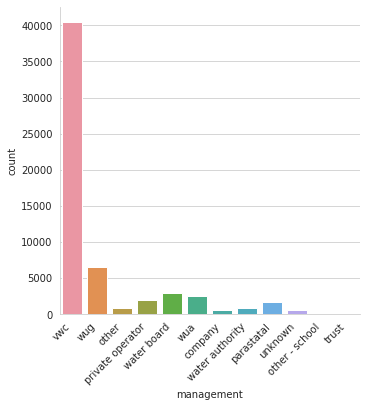

In [24]:
sns.catplot(x = 'management', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

**`management_group`**

In [14]:
X_train['management_group'].describe()

count          59400
unique             5
top       user-group
freq           52490
Name: management_group, dtype: object

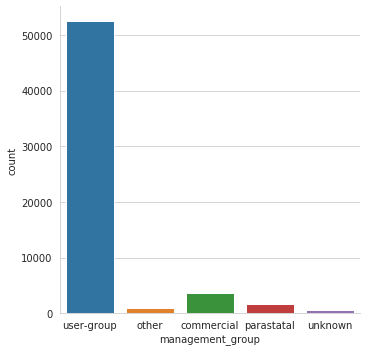

In [26]:
sns.catplot(x = 'management_group', kind = 'count', data = X_train)

**`scheme_management`**

In [27]:
X_train['scheme_management'].describe()

count     55523
unique       12
top         VWC
freq      36793
Name: scheme_management, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

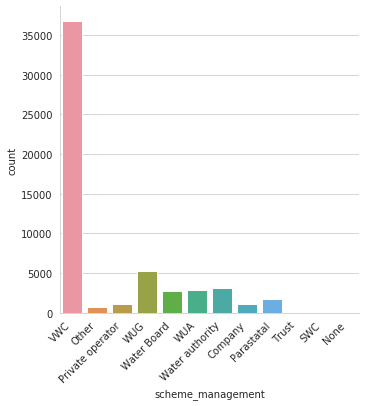

In [29]:
sns.catplot(x = 'scheme_management', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

**`scheme_name`**

In [152]:
X_train.scheme_name.describe()

count     31234
unique     2696
top           K
freq        682
Name: scheme_name, dtype: object

In [36]:
X_train[X_train['scheme_name'].notna()]['scheme_name'].head(n=15)

0                           Roman
2     Nyumba ya mungu pipe scheme
5                       Zingibali
13                     BL Bondeni
14                           None
16    wanging'ombe water supply s
17    wanging'ombe water supply s
19                         Makanj
20                         Kidabu
22    wanging'ombe water supply s
23                      Mashangwi
24             Quick wins Program
25                 Komaka mandaka
26         Sobodo Borehole Scheme
28          Kitukuni water supply
Name: scheme_name, dtype: object

With the third largest number of levels (2696 unique values) `scheme_name` describes who operates the waterpoint. This information is supposedly also available in `scheme_management` (which contains a much more reasonable 12 levels). As another feature provides similar information, and due to the fact that nearly half of the observations are missing, I'll be dropping scheme name from the working set as well. 

#### Extraction Features

**`extraction_type`**

In [38]:
X_train['extraction_type'].describe()

count       59400
unique         18
top       gravity
freq        26780
Name: extraction_type, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

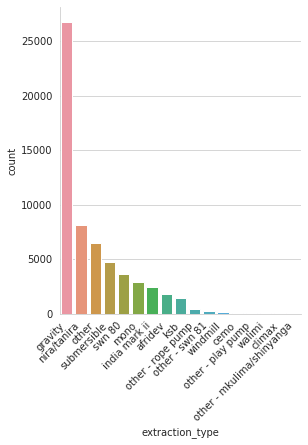

In [74]:
order = ['gravity', 'nira/tanira', 'other', 'submersible', 'swn 80', 'mono', 'india mark ii', 'afridev', 'ksb', 'other - rope pump', 'other - swn 81', 'windmill', 'cemo', 'other - play pump', 'walimi', 'climax', 'other - mkulima/shinyanga']
sns.catplot(x = 'extraction_type', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

**`extraction_type_group`**

In [41]:
X_train['extraction_type_group'].describe()

count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

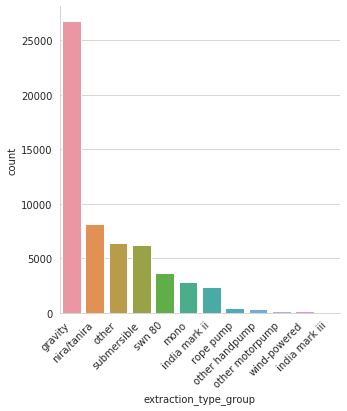

In [58]:
order = ['gravity', 'nira/tanira', 'other', 'submersible', 'swn 80', 'mono', 'india mark ii', 'rope pump', 'other handpump', 'other motorpump', 'wind-powered', 'india mark iii']
sns.catplot(x = 'extraction_type_group', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

**`extraction_type_class`**

In [42]:
X_train['extraction_type_class'].describe()

count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

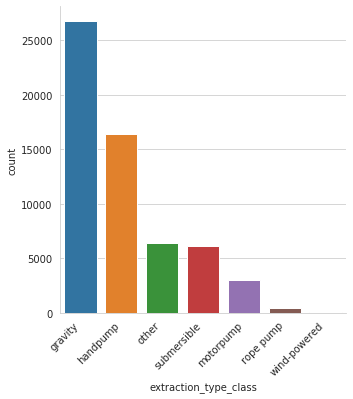

In [55]:
order = ['gravity', 'handpump', 'other', 'submersible', 'motorpump', 'rope pump', 'wind-powered']
sns.catplot(x = 'extraction_type_class', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

#### Source Features

**`source`**

In [75]:
X_train['source'].describe()

count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

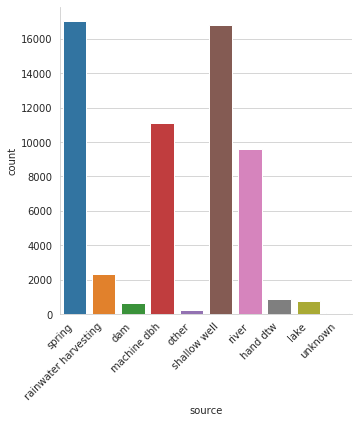

In [134]:
sns.catplot(x = 'source', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

**`source_type`**

In [76]:
X_train['source_type'].describe()

count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

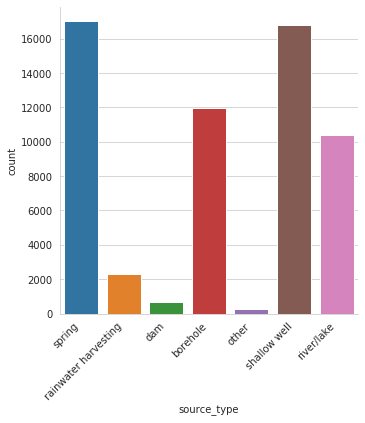

In [135]:
sns.catplot(x = 'source_type', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

**`source_class`**

In [77]:
X_train['source_class'].describe()

count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

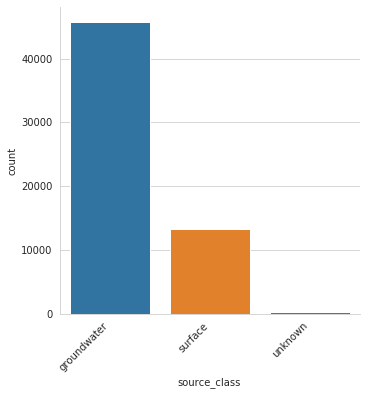

In [136]:
sns.catplot(x = 'source_class', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

### Comments on Missing Data and Handling

There are 7 features in the training set for which we have missing values. These are, 
+ funder - Who funded the well
+ installer - Who installed the well
+ subvillage - Name of the village in which the well is located
+ public_meeting - The information on this feature that I have is just that it is True/False. I assume that this marks whether the well is used as or located at a public meeting place in the subvillage.
+ scheme_management - Who operates the waterpoint. IE The type of management system/board set up for the water point
+ scheme-name - The name of the presiding system/board managing the waterpoint
+ permit - True/False is the waterpoint permitted (IE does it have a  permit, not "is it allowable")


From the heatmap above, it seems that the missing values for `funder` and `installer` tend to occur together. Let's review this interaction a little more: 

In [45]:
X_train.shape[0] - (X_train['funder'].isna() == X_train['installer'].isna()).sum()

126

In [165]:
from Keys import access_token
import requests
access_token = access_token
def get_elevation_single(lat, long, access_token = access_token):
    #This function will query the Jawg API
    #using a given latitude and longitude
    #You need an access token for the Jawg API, but they can be aquired for free through their website
    query = ('https://api.jawg.io/elevations?locations={},{}&access-token={}'.format(lat, long, access_token))
    r = requests.get(query).json()

    #extracting elevation from the json object
    elevation = pd.io.json.json_normalize(r)['elevation'].values[0]
    return(elevation)

In [166]:
get_elevation_single(X_train['latitude'][135], X_train['longitude'][135])

2010.7998

## Reviewing the Testing Set

In [8]:
X_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [18]:
test.shape

(14850, 40)

In [188]:
test.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

## References  

This cell contains the markdown code for all the referential links used in this notebook. Edit the cell to review the links as a list.

[1]: https://en.wikipedia.org/wiki/Subdivisions_of_Tanzania "Wikipedia article on the Subdivisons of Tanzania"


